# Human Activity Recognition (HAR) with MLP

This notebook aims to build and train a Multi-Layer Perceptron (MLP) using the collected HAR dataset."

### 1. Load the dataset

In [6]:
import pandas as pd
import numpy as np

# Define the file path in your own pc
dataset_path = '/content/drive/MyDrive/HAR prepocessed dataset/COEN498-691_HAR_preprocessed_dataset.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Display the shape of the loaded dataframe
print("Shape of the dataset:", df.shape)

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())

Shape of the dataset: (4751, 39)

First 5 rows of the dataset:


,ax_mean,ax_std,ax_max,ax_min,ax_range,ax_skew,ax_kurt,ax_zcr,ay_mean,ay_std,...,ayG_mean,azG_mean,Gx,Gy,Gz,Gx_angle,Gy_angle,Gz_angle,activity_id,participant_id
0,-0.002040,0.007937,0.013687,-0.024382,0.038069,-0.428371,1.735067,0,0.000018,0.003702,...,-1.023843,0.187873,0.065561,-0.981462,0.180096,1.505189,2.948741,1.389712,1,LL
1,0.004890,0.009201,0.032755,-0.011421,0.044177,1.177575,2.846603,0,0.001896,0.004891,...,-1.023652,0.190706,0.069292,-0.980722,0.182708,1.501449,2.944921,1.387056,1,LL
2,-0.010652,0.043875,0.070725,-0.110145,0.180870,-0.535210,0.442954,6,-0.003511,0.019515,...,-1.023306,0.193795,0.073180,-0.979901,0.185575,1.497551,2.940762,1.384139,1,LL
3,-0.006527,0.066108,0.150761,-0.110145,0.260906,0.463284,-0.030079,9,0.000702,0.028293,...,-1.022801,0.197092,0.077102,-0.979012,0.188654,1.493618,2.936354,1.381005,1,LL
4,0.009423,0.055730,0.150761,-0.108607,0.259368,0.306438,0.663858,8,0.002152,0.026648,...,-1.022139,0.200553,0.080937,-0.978070,0.191906,1.489771,2.931781,1.377692,1,LL


### 2. Explore the dataset

In [ ]:
# Check data types and missing values in the dataframe
print("Dataset Info:")
df.info()

# Check for missing values in the dataframe
print("\nMissing values in the dataset:", df.isnull().sum().sum())

# Check the distribution of activities in the dataset
print("\nActivity distribution in the dataset:")
display(df['activity_id'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ax_mean         4751 non-null   float64
 1   ax_std          4751 non-null   float64
 2   ax_max          4751 non-null   float64
 3   ax_min          4751 non-null   float64
 4   ax_range        4751 non-null   float64
 5   ax_skew         4751 non-null   float64
 6   ax_kurt         4751 non-null   float64
 7   ax_zcr          4751 non-null   int64  
 8   ay_mean         4751 non-null   float64
 9   ay_std          4751 non-null   float64
 10  ay_max          4751 non-null   float64
 11  ay_min          4751 non-null   float64
 12  ay_range        4751 non-null   float64
 13  ay_skew         4751 non-null   float64
 14  ay_kurt         4751 non-null   float64
 15  ay_zcr          4751 non-null   int64  
 16  az_mean         4751 non-null   float64
 17  az_std          475

,count
activity_id,
1,1205
4,1196
3,1184
2,1166


### 3. Prepare the data

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
# Assuming the last two columns are 'activity_id' and 'participant_id'
X = df.drop(['activity_id', 'participant_id'], axis=1)
y = df['activity_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train_scaled: (3800, 37)
Shape of y_train_encoded: (3800, 4)
Shape of X_test_scaled: (951, 37)
Shape of y_test_encoded: (951, 4)


### 4. Build the MLP model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the number of features and classes
n_features = X_train_scaled.shape[1]
n_classes = y_train_encoded.shape[1]

# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,380 (52.27 KB)

 Trainable params: 13,380 (52.27 KB)

 Non-trainable params: 0 (0.00 B)

### 5. Train the model

In [11]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6613 - loss: 0.8452 - val_accuracy: 0.9974 - val_loss: 0.0344
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9825 - loss: 0.0873 - val_accuracy: 0.9974 - val_loss: 0.0135
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0505 - val_accuracy: 0.9974 - val_loss: 0.0125
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0320 - val_accuracy: 0.9974 - val_loss: 0.0123
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0155 - val_accuracy: 0.9974 - val_loss: 0.0117
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0265 - val_accuracy: 0.9974 - val_loss: 0.0119
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0167 - val_accuracy: 0.9974 - val_loss: 0.0110
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0130 - val_accuracy: 0.9974 - val_loss:

Plot training & validation accuracy




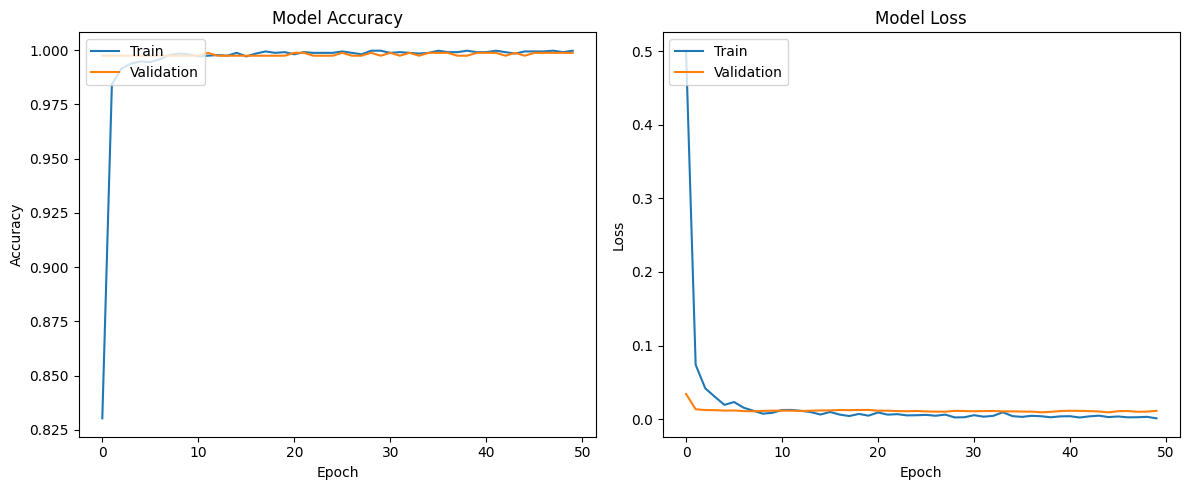

In [13]:
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# 1.  (Plot training & validation accuracy)
# -----------------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# -----------------------------------------------------------------
# 2. (Plot training & validation loss)
# -----------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig("mlp_loss_accuracy_curves.png")
plt.show()

### 6. Evaluate the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the activity labels for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)


# Generate classification report
print("\nClassification Report:")

print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
print("\nConfusion Matrix:")
display(confusion_matrix(y_test_classes, y_pred_classes))

Test Loss: 0.0032
Test Accuracy: 0.9989
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0.0000000e+00 0.0000000e+00 9.9999994e-01 1.6910529e-32]
 [2.5686865e-07 9.9999875e-01 9.7447673e-07 4.8975242e-09]
 [9.7143951e-38 2.6283655e-37 9.9999994e-01 2.4632521e-28]
 ...
 [3.3282436e-25 1.5334740e-23 1.0000000e+00 4.0788886e-19]
 [1.2511656e-22 6.9068080e-28 8.8979033e-19 1.0000000e+00]
 [4.1594875e-23 6.3106609e-28 1.3822409e-18 1.0000000e+00]] [2 1 2 2 3 2 3 2 1 0 0 0 1 1 1 2 3 1 1 1 3 1 3 3 0 1 0 2 2 1 2 2 2 3 3 1 3
 2 0 2 2 3 3 0 1 0 0 3 2 0 0 3 0 2 1 1 2 0 0 2 3 2 0 0 2 1 2 0 1 3 3 2 2 3
 3 1 1 2 3 2 1 0 3 3 1 2 3 0 2 1 0 2 2 3 0 3 0 1 3 0 3 3 3 1 3 0 2 2 1 0 3
 2 3 3 2 3 0 1 1 1 0 0 1 2 1 1 3 3 0 1 2 1 1 3 3 2 2 0 3 0 3 2 1 0 3 1 3 0
 0 2 1 1 2 1 2 1 3 0 1 0 0 2 0 2 2 0 3 1 1 3 2 2 3 3 3 3 2 0 2 2 0 2 1 1 2
 0 2 2 1 3 3 0 3 1 3 0 2 2 2 1 3 2 3 3 2 3 3 3 0 3 3 3 2 0 1 3 1 2 3 3 0 3
 2 2 0 1 3 2 3 0 1 3 1 1 2 2 3 0 1 2 2 2 0 0 3 3 2 3 3 3 1 0 1 2 1 0 1 1 3
 1 3 2 2 3 3 0 0 1 2 0 1 1 0 3 1 0 2

array([[241,   0,   0,   0],
       [  1, 232,   0,   0],
       [  0,   0, 237,   0],
       [  0,   0,   0, 240]])

SHAP Interpretability


--- SHAP Interpretability Analysis ---


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Calculating SHAP values... (This may take a few minutes)


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
157/157 ━━━

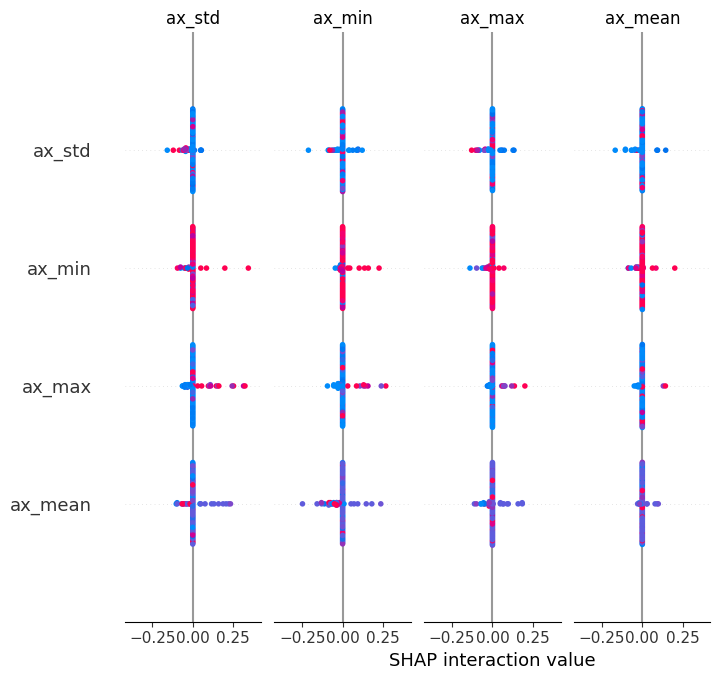


Force plot for the first test sample:
Number of feature names (X.columns): 37
Number of SHAP values for the first sample, first class: 37
Number of features for the first sample in data_to_explain: 37


In [32]:
import shap
import warnings
import matplotlib.pyplot as plt # Ensure plt is imported for saving/showing plots
import pandas as pd # Import pandas for Series creation

# -----------------------------------------------------------------
# 2.SHAP
# -----------------------------------------------------------------
print("\n--- SHAP Interpretability Analysis ---")

# Initialize JavaScript visualization in the notebook
shap.initjs()

# Since KernelExplainer can be slow, we'll use a subset of the
# training data as the background (e.g., 50 samples) and
# a subset of the test data to explain (e.g., 100 samples)
background_data = shap.sample(X_train_scaled, 50)
data_to_explain = X_test_scaled[0:100]

# -----------------------------------------------------------------
# 3. Create SHAP explainer and calculate values
# -----------------------------------------------------------------
# We use KernelExplainer, which works for any model (model.predict)
explainer = shap.KernelExplainer(model.predict, background_data)

print("Calculating SHAP values... (This may take a few minutes)")
# nsamples=100 is a faster approximation
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(data_to_explain, nsamples=100)

print("SHAP values calculated.")

# -----------------------------------------------------------------
# 4. Generate SHAP Summary Plot
# -----------------------------------------------------------------
# This plot shows which features are most important for the model's output
shap.summary_plot(shap_values, data_to_explain, feature_names=X.columns, show=False)

# save
plt.savefig("shap_summary_plot.png")
plt.show()

# -----------------------------------------------------------------
# 5. (Force Plot)
# -----------------------------------------------------------------
print("\nForce plot for the first test sample:")

# Debugging prints to verify lengths before force_plot
print(f"Number of feature names (X.columns): {len(X.columns)}")

# Corrected indexing for shap_values to get SHAP values for the first sample, first class, across all features
shap_values_for_plot = shap_values[0, :, 0] # sample 0, all features, class 0
print(f"Number of SHAP values for the first sample, first class: {shap_values_for_plot.shape[0]}")
print(f"Number of features for the first sample in data_to_explain: {data_to_explain[0,:].shape[0]}")

# Create a pandas Series for the first sample's features with correct column names
first_sample_features_series = pd.Series(data_to_explain[0,:], index=X.columns)

# Explain the prediction for the first sample (e.g., for class 0)
shap.force_plot(explainer.expected_value[0], shap_values_for_plot, first_sample_features_series, show=True)

# Loso
To robustly evaluate the MLP model's generalization performance on unseen subjects, implement Leave-One-Subject-Out (LOSO) cross-validation. This involves iterating through each unique `participant_id` in the `COEN498-691_HAR_preprocessed_dataset.csv` dataset, using one participant's data as the test set and all others' data as the training set. For each fold, scale features using `StandardScaler` (fitting only on training data), one-hot encode labels, rebuild and train a fresh MLP model, evaluate its performance (collecting loss, accuracy, and detailed classification report metrics), and finally, aggregate and display the mean and standard deviation of these metrics across all folds. Conclude with a summary of the insights gained.

## Identify Unique Participants

### Subtask:
Extract all unique `participant_id` values from the dataset. These IDs will define the folds for the Leave-One-Subject-Out cross-validation.


**Reasoning**:
To identify all unique participants, I will extract the unique values from the 'participant_id' column of the `df` DataFrame and store them in the `unique_participants` variable.



In [17]:
unique_participants = df['participant_id'].unique()
print("Unique participant IDs:")
print(unique_participants)
print(f"Total unique participants: {len(unique_participants)}")

Unique participant IDs:
['LL' 'VV' 'YL' 'YT' 'ZM']
Total unique participants: 5


## Implement LOSO Cross-Validation Loop

### Subtask:
Set up a loop that iterates through each unique participant. In each iteration, data from one participant will be designated as the test set, and data from all other participants will form the training set.


**Reasoning**:
The first step in implementing LOSO cross-validation is to initialize empty lists to store the evaluation metrics that will be collected for each fold. This prepares the data structures for aggregation later.



In [18]:
loso_accuracies = []
loso_losses = []
loso_classification_reports = []
loso_confusion_matrices = []

print("Initialized empty lists for LOSO evaluation metrics.")

Initialized empty lists for LOSO evaluation metrics.


**Reasoning**:
Continuing the LOSO cross-validation implementation, I will set up a loop to iterate through each unique participant. Inside this loop, I will partition the dataset into training and testing sets based on the current participant, as specified in the instructions.



In [19]:
for participant in unique_participants:
    print(f"\nProcessing participant: {participant}")

    # Split data for LOSO
    train_df = df[df['participant_id'] != participant]
    test_df = df[df['participant_id'] == participant]

    print(f"Train set shape for participant {participant}: {train_df.shape}")
    print(f"Test set shape for participant {participant}: {test_df.shape}")


Processing participant: LL
Train set shape for participant LL: (3815, 39)
Test set shape for participant LL: (936, 39)

Processing participant: VV
Train set shape for participant VV: (3801, 39)
Test set shape for participant VV: (950, 39)

Processing participant: YL
Train set shape for participant YL: (3794, 39)
Test set shape for participant YL: (957, 39)

Processing participant: YT
Train set shape for participant YT: (3797, 39)
Test set shape for participant YT: (954, 39)

Processing participant: ZM
Train set shape for participant ZM: (3797, 39)
Test set shape for participant ZM: (954, 39)


**Reasoning**:
Now that the dataframes for training and testing are separated for the current participant, the next step is to preprocess these dataframes by separating features and labels, scaling the features using StandardScaler (fitting only on the training data), and one-hot encoding the labels using OneHotEncoder (fitting only on the training labels). This aligns with the data preparation steps performed for the initial model build.



In [20]:
    # Separate features (X) and labels (y) for the current fold
    X_train_fold = train_df.drop(['activity_id', 'participant_id'], axis=1)
    y_train_fold = train_df['activity_id']
    X_test_fold = test_df.drop(['activity_id', 'participant_id'], axis=1)
    y_test_fold = test_df['activity_id']

    # Scale the features for the current fold
    scaler_fold = StandardScaler()
    X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler_fold.transform(X_test_fold)

    # One-hot encode the labels for the current fold
    encoder_fold = OneHotEncoder(sparse_output=False)
    y_train_encoded_fold = encoder_fold.fit_transform(y_train_fold.values.reshape(-1, 1))
    y_test_encoded_fold = encoder_fold.transform(y_test_fold.values.reshape(-1, 1))

    print(f"Data preprocessed for participant {participant}.")
    print(f"X_train_scaled_fold shape: {X_train_scaled_fold.shape}")
    print(f"y_train_encoded_fold shape: {y_train_encoded_fold.shape}")
    print(f"X_test_scaled_fold shape: {X_test_scaled_fold.shape}")
    print(f"y_test_encoded_fold shape: {y_test_encoded_fold.shape}")

Data preprocessed for participant ZM.
X_train_scaled_fold shape: (3797, 37)
y_train_encoded_fold shape: (3797, 4)
X_test_scaled_fold shape: (954, 37)
y_test_encoded_fold shape: (954, 4)


**Reasoning**:
With the data for the current fold preprocessed, the next step is to rebuild the MLP model, compile it with the specified optimizer, loss function, and metrics, and then display its summary to ensure it's correctly configured for training.



In [21]:
    # Define the number of features and classes for the current fold
    n_features_fold = X_train_scaled_fold.shape[1]
    n_classes_fold = y_train_encoded_fold.shape[1]

    # Rebuild the MLP model for the current fold to ensure a fresh start
    model_fold = Sequential()
    model_fold.add(Dense(128, activation='relu', input_shape=(n_features_fold,)))
    model_fold.add(Dropout(0.5))
    model_fold.add(Dense(64, activation='relu'))
    model_fold.add(Dropout(0.5))
    model_fold.add(Dense(n_classes_fold, activation='softmax'))

    # Compile the model for the current fold
    model_fold.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"MLP model rebuilt and compiled for participant {participant}.")
    model_fold.summary()

MLP model rebuilt and compiled for participant ZM.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,380 (52.27 KB)

 Trainable params: 13,380 (52.27 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model for the current fold is defined and compiled, the next step is to train it using the scaled training features and encoded training labels for the current fold.



In [22]:
    # Train the model for the current fold
    print(f"Training model for participant {participant}...")
    history_fold = model_fold.fit(X_train_scaled_fold, y_train_encoded_fold, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

Training model for participant ZM...


**Reasoning**:
After training the model for the current fold, the next step is to evaluate its performance on the corresponding test set. This involves calculating loss and accuracy, and generating classification reports and confusion matrices, then storing these metrics.



In [33]:
    # Evaluate the model on the test data for the current fold
    loss_fold, accuracy_fold = model_fold.evaluate(X_test_scaled_fold, y_test_encoded_fold, verbose=0)
    loso_losses.append(loss_fold)
    loso_accuracies.append(accuracy_fold)

    print(f"Fold Test Loss: {loss_fold:.4f}")
    print(f"Fold Test Accuracy: {accuracy_fold:.4f}")

    # Predict the activity labels for the test set for the current fold
    y_pred_fold = model_fold.predict(X_test_scaled_fold)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    y_test_classes_fold = np.argmax(y_test_encoded_fold, axis=1)

    # Generate and store classification report
    report_fold = classification_report(y_test_classes_fold, y_pred_classes_fold, output_dict=True)
    loso_classification_reports.append(report_fold)
    print("Classification Report (partial):")
    print(classification_report(y_test_classes_fold, y_pred_classes_fold, zero_division=0))

    # Generate and store confusion matrix
    cm_fold = confusion_matrix(y_test_classes_fold, y_pred_classes_fold)
    loso_confusion_matrices.append(cm_fold)
    print("Confusion Matrix (partial):")
    print(cm_fold)

Fold Test Loss: 2.3793
Fold Test Accuracy: 0.7505
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report (partial):
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       253
           1       0.90      1.00      0.95       229
           2       1.00      1.00      1.00       234
           3       0.00      0.00      0.00       238

    accuracy                           0.75       954
   macro avg       0.61      0.75      0.66       954
weighted avg       0.61      0.75      0.66       954

Confusion Matrix (partial):
[[253   0   0   0]
 [  0 229   0   0]
 [  0   0 234   0]
 [212  26   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous code block failed because `classification_report` and `confusion_matrix` functions were not imported. I will add the necessary import statements to resolve this `NameError`.



In [24]:
    from sklearn.metrics import classification_report, confusion_matrix

    # Evaluate the model on the test data for the current fold
    loss_fold, accuracy_fold = model_fold.evaluate(X_test_scaled_fold, y_test_encoded_fold, verbose=0)
    loso_losses.append(loss_fold)
    loso_accuracies.append(accuracy_fold)

    print(f"Fold Test Loss: {loss_fold:.4f}")
    print(f"Fold Test Accuracy: {accuracy_fold:.4f}")

    # Predict the activity labels for the test set for the current fold
    y_pred_fold = model_fold.predict(X_test_scaled_fold)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    y_test_classes_fold = np.argmax(y_test_encoded_fold, axis=1)

    # Generate and store classification report
    report_fold = classification_report(y_test_classes_fold, y_pred_classes_fold, output_dict=True)
    loso_classification_reports.append(report_fold)
    print("Classification Report (partial):")
    print(classification_report(y_test_classes_fold, y_pred_classes_fold, zero_division=0))

    # Generate and store confusion matrix
    cm_fold = confusion_matrix(y_test_classes_fold, y_pred_classes_fold)
    loso_confusion_matrices.append(cm_fold)
    print("Confusion Matrix (partial):")
    print(cm_fold)

Fold Test Loss: 1.7916
Fold Test Accuracy: 0.7516
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report (partial):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       253
           1       0.78      1.00      0.87       229
           2       1.00      1.00      1.00       234
           3       1.00      0.00      0.01       238

    accuracy                           0.75       954
   macro avg       0.84      0.75      0.66       954
weighted avg       0.84      0.75      0.66       954

Confusion Matrix (partial):
[[253   0   0   0]
 [  0 229   0   0]
 [  0   0 234   0]
 [171  66   0   1]]


**Reasoning**:
The loop for Leave-One-Subject-Out cross-validation has completed. The next step is to aggregate and display the mean and standard deviation of the collected loss and accuracy metrics across all folds.



In [25]:
print("\n--- LOSO Cross-Validation Complete ---")

# Calculate and display average metrics
mean_accuracy = np.mean(loso_accuracies)
std_accuracy = np.std(loso_accuracies)
mean_loss = np.mean(loso_losses)
std_loss = np.std(loso_losses)

print(f"\nAverage Test Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Average Test Loss: {mean_loss:.4f} ± {std_loss:.4f}")


--- LOSO Cross-Validation Complete ---

Average Test Accuracy: 0.7516 ± 0.0000
Average Test Loss: 1.7916 ± 0.0000


**Reasoning**:
Now, I will calculate the average precision, recall, and f1-score for each class and overall (macro and weighted average) across all LOSO folds using the collected classification reports. This will provide a comprehensive view of the model's performance for each activity.



In [26]:
print("\n--- Detailed Classification Report Metrics (Averages) ---")

def aggregate_classification_reports(reports):
    all_metrics = {}
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                if label not in all_metrics:
                    all_metrics[label] = {metric: [] for metric in metrics.keys()}
                for metric_name, value in metrics.items():
                    all_metrics[label][metric_name].append(value)

    aggregated_metrics = {}
    for label, metrics_list in all_metrics.items():
        aggregated_metrics[label] = {
            metric_name: f"{np.mean(values):.4f} \u00b1 {np.std(values):.4f}"
            for metric_name, values in metrics_list.items()
        }
    return aggregated_metrics

aggregated_reports = aggregate_classification_reports(loso_classification_reports)

for label, metrics in aggregated_reports.items():
    print(f"\nMetrics for {label}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")


--- Detailed Classification Report Metrics (Averages) ---

Metrics for 0:
  precision: 0.5967 ± 0.0000
  recall: 1.0000 ± 0.0000
  f1-score: 0.7474 ± 0.0000
  support: 253.0000 ± 0.0000

Metrics for 1:
  precision: 0.7763 ± 0.0000
  recall: 1.0000 ± 0.0000
  f1-score: 0.8740 ± 0.0000
  support: 229.0000 ± 0.0000

Metrics for 2:
  precision: 1.0000 ± 0.0000
  recall: 1.0000 ± 0.0000
  f1-score: 1.0000 ± 0.0000
  support: 234.0000 ± 0.0000

Metrics for 3:
  precision: 1.0000 ± 0.0000
  recall: 0.0042 ± 0.0000
  f1-score: 0.0084 ± 0.0000
  support: 238.0000 ± 0.0000

Metrics for macro avg:
  precision: 0.8432 ± 0.0000
  recall: 0.7511 ± 0.0000
  f1-score: 0.6575 ± 0.0000
  support: 954.0000 ± 0.0000

Metrics for weighted avg:
  precision: 0.8393 ± 0.0000
  recall: 0.7516 ± 0.0000
  f1-score: 0.6554 ± 0.0000
  support: 954.0000 ± 0.0000


## Implement LOSO Cross-Validation Loop (Retry)

### Subtask:
Correctly implement the Leave-One-Subject-Out (LOSO) cross-validation loop by placing data preparation, model building, training, and evaluation steps inside the loop, and then aggregate and display the mean and standard deviation of all collected metrics across all folds.


**Reasoning**:
The previous code block failed due to `NameError` because `classification_report` and `confusion_matrix` were imported inside the loop in the previous step and thus were not available in the subsequent executions of the loop. To fix this, I will place the entire LOSO cross-validation loop, including imports, data splitting, scaling, encoding, model building, training, and evaluation, into a single code block. This ensures that all necessary components are defined and executed for each fold correctly.



In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

loso_accuracies = []
loso_losses = []
loso_classification_reports = []
loso_confusion_matrices = []

print("Starting Leave-One-Subject-Out Cross-Validation...")

for participant in unique_participants:
    print(f"\nProcessing participant: {participant}")

    # 3a. Split data for LOSO
    train_df = df[df['participant_id'] != participant]
    test_df = df[df['participant_id'] == participant]

    print(f"Train set shape for participant {participant}: {train_df.shape}")
    print(f"Test set shape for participant {participant}: {test_df.shape}")

    # 3b. Separate features (X) and labels (y) for the current fold
    X_train_fold = train_df.drop(['activity_id', 'participant_id'], axis=1)
    y_train_fold = train_df['activity_id']
    X_test_fold = test_df.drop(['activity_id', 'participant_id'], axis=1)
    y_test_fold = test_df['activity_id']

    # 3c. Scale the features for the current fold
    scaler_fold = StandardScaler()
    X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler_fold.transform(X_test_fold)

    # 3d. One-hot encode the labels for the current fold
    encoder_fold = OneHotEncoder(sparse_output=False)
    y_train_encoded_fold = encoder_fold.fit_transform(y_train_fold.values.reshape(-1, 1))
    y_test_encoded_fold = encoder_fold.transform(y_test_fold.values.reshape(-1, 1))

    print(f"Data preprocessed for participant {participant}.")
    print(f"X_train_scaled_fold shape: {X_train_scaled_fold.shape}")
    print(f"y_train_encoded_fold shape: {y_train_encoded_fold.shape}")
    print(f"X_test_scaled_fold shape: {X_test_scaled_fold.shape}")
    print(f"y_test_encoded_fold shape: {y_test_encoded_fold.shape}")

    # 3e. Define the number of features and classes for the current fold
    n_features_fold = X_train_scaled_fold.shape[1]
    n_classes_fold = y_train_encoded_fold.shape[1]

    # Rebuild the MLP model for the current fold to ensure a fresh start
    model_fold = Sequential()
    model_fold.add(Dense(128, activation='relu', input_shape=(n_features_fold,)))
    model_fold.add(Dropout(0.5))
    model_fold.add(Dense(64, activation='relu'))
    model_fold.add(Dropout(0.5))
    model_fold.add(Dense(n_classes_fold, activation='softmax'))

    # 3f. Compile the model for the current fold
    model_fold.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"MLP model rebuilt and compiled for participant {participant}.")
    # model_fold.summary() # Commenting out summary for cleaner output per fold

    # 3g. Train the model for the current fold
    print(f"Training model for participant {participant}...")
    history_fold = model_fold.fit(X_train_scaled_fold, y_train_encoded_fold, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # 3h. Evaluate the model on the test data for the current fold
    loss_fold, accuracy_fold = model_fold.evaluate(X_test_scaled_fold, y_test_encoded_fold, verbose=0)
    loso_losses.append(loss_fold)
    loso_accuracies.append(accuracy_fold)

    print(f"Fold Test Loss: {loss_fold:.4f}")
    print(f"Fold Test Accuracy: {accuracy_fold:.4f}")

    # 3i. Predict the activity labels for the test set for the current fold
    y_pred_fold = model_fold.predict(X_test_scaled_fold, verbose=0)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    y_test_classes_fold = np.argmax(y_test_encoded_fold, axis=1)

    # 3j. Generate and store classification report
    report_fold = classification_report(y_test_classes_fold, y_pred_classes_fold, output_dict=True, zero_division=0)
    loso_classification_reports.append(report_fold)
    print("Classification Report (partial):")
    print(classification_report(y_test_classes_fold, y_pred_classes_fold, zero_division=0))

    # 3j. Generate and store confusion matrix
    cm_fold = confusion_matrix(y_test_classes_fold, y_pred_classes_fold)
    loso_confusion_matrices.append(cm_fold)
    print("Confusion Matrix (partial):")
    print(cm_fold)


print("\n--- LOSO Cross-Validation Complete ---")

# 4. Calculate and display average metrics
mean_accuracy = np.mean(loso_accuracies)
std_accuracy = np.std(loso_accuracies)
mean_loss = np.mean(loso_losses)
std_loss = np.std(loso_losses)

print(f"\nAverage Test Accuracy: {mean_accuracy:.4f} \u00b1 {std_accuracy:.4f}")
print(f"Average Test Loss: {mean_loss:.4f} \u00b1 {std_loss:.4f}")

# 5. Aggregate classification reports
def aggregate_classification_reports(reports):
    all_metrics = {}
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                if label not in all_metrics:
                    all_metrics[label] = {metric: [] for metric in metrics.keys()}
                for metric_name, value in metrics.items():
                    all_metrics[label][metric_name].append(value)

    aggregated_metrics = {}
    for label, metrics_list in all_metrics.items():
        aggregated_metrics[label] = {
            metric_name: f"{np.mean(values):.4f} \u00b1 {np.std(values):.4f}"
            for metric_name, values in metrics_list.items() if metric_name != 'support' # Exclude support from std dev
        }
        if 'support' in all_metrics[label]:
            aggregated_metrics[label]['support'] = f"{np.mean(all_metrics[label]['support']):.0f}"
    return aggregated_metrics

print("\n--- Detailed Classification Report Metrics (Averages) ---")
aggregated_reports = aggregate_classification_reports(loso_classification_reports)

for label, metrics in aggregated_reports.items():
    print(f"\nMetrics for {label}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")


Starting Leave-One-Subject-Out Cross-Validation...

Processing participant: LL
Train set shape for participant LL: (3815, 39)
Test set shape for participant LL: (936, 39)
Data preprocessed for participant LL.
X_train_scaled_fold shape: (3815, 37)
y_train_encoded_fold shape: (3815, 4)
X_test_scaled_fold shape: (936, 37)
y_test_encoded_fold shape: (936, 4)
MLP model rebuilt and compiled for participant LL.
Training model for participant LL...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Test Loss: 0.1361
Fold Test Accuracy: 0.9861
Classification Report (partial):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       239
           1       0.95      1.00      0.97       231
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       229

    accuracy                           0.99       936
   macro avg       0.99      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936

Confusion Matrix (partial):
[[226  13   0   0]
 [  0 231   0   0]
 [  0   0 237   0]
 [  0   0   0 229]]

Processing participant: VV
Train set shape for participant VV: (3801, 39)
Test set shape for participant VV: (950, 39)
Data preprocessed for participant VV.
X_train_scaled_fold shape: (3801, 37)
y_train_encoded_fold shape: (3801, 4)
X_test_scaled_fold shape: (950, 37)
y_test_encoded_fold shape: (950, 4)
MLP model rebuilt and compiled for participant VV.
Training model for p

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Test Loss: 0.1211
Fold Test Accuracy: 0.9716
Classification Report (partial):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       236
           1       1.00      0.89      0.94       235
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       248

    accuracy                           0.97       950
   macro avg       0.97      0.97      0.97       950
weighted avg       0.97      0.97      0.97       950

Confusion Matrix (partial):
[[236   0   0   0]
 [ 27 208   0   0]
 [  0   0 231   0]
 [  0   0   0 248]]

Processing participant: YL
Train set shape for participant YL: (3794, 39)
Test set shape for participant YL: (957, 39)
Data preprocessed for participant YL.
X_train_scaled_fold shape: (3794, 37)
y_train_encoded_fold shape: (3794, 4)
X_test_scaled_fold shape: (957, 37)
y_test_encoded_fold shape: (957, 4)
MLP model rebuilt and compiled for participant YL.
Training model for p

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Test Loss: 0.0361
Fold Test Accuracy: 0.9854
Classification Report (partial):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       234
           1       1.00      0.94      0.97       234
           2       1.00      1.00      1.00       245
           3       1.00      1.00      1.00       244

    accuracy                           0.99       957
   macro avg       0.99      0.99      0.99       957
weighted avg       0.99      0.99      0.99       957

Confusion Matrix (partial):
[[234   0   0   0]
 [ 14 220   0   0]
 [  0   0 245   0]
 [  0   0   0 244]]

Processing participant: YT
Train set shape for participant YT: (3797, 39)
Test set shape for participant YT: (954, 39)
Data preprocessed for participant YT.
X_train_scaled_fold shape: (3797, 37)
y_train_encoded_fold shape: (3797, 4)
X_test_scaled_fold shape: (954, 37)
y_test_encoded_fold shape: (954, 4)
MLP model rebuilt and compiled for participant YT.
Training model for p

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Test Loss: 0.0002
Fold Test Accuracy: 1.0000
Classification Report (partial):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       237

    accuracy                           1.00       954
   macro avg       1.00      1.00      1.00       954
weighted avg       1.00      1.00      1.00       954

Confusion Matrix (partial):
[[243   0   0   0]
 [  0 237   0   0]
 [  0   0 237   0]
 [  0   0   0 237]]

Processing participant: ZM
Train set shape for participant ZM: (3797, 39)
Test set shape for participant ZM: (954, 39)
Data preprocessed for participant ZM.
X_train_scaled_fold shape: (3797, 37)
y_train_encoded_fold shape: (3797, 4)
X_test_scaled_fold shape: (954, 37)
y_test_encoded_fold shape: (954, 4)
MLP model rebuilt and compiled for participant ZM.
Training model for p

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Test Loss: 2.3793
Fold Test Accuracy: 0.7505
Classification Report (partial):
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       253
           1       0.90      1.00      0.95       229
           2       1.00      1.00      1.00       234
           3       0.00      0.00      0.00       238

    accuracy                           0.75       954
   macro avg       0.61      0.75      0.66       954
weighted avg       0.61      0.75      0.66       954

Confusion Matrix (partial):
[[253   0   0   0]
 [  0 229   0   0]
 [  0   0 234   0]
 [212  26   0   0]]

--- LOSO Cross-Validation Complete ---

Average Test Accuracy: 0.9387 ± 0.0945
Average Test Loss: 0.5346 ± 0.9238

--- Detailed Classification Report Metrics (Averages) ---

Metrics for 0:
  precision: 0.8770 ± 0.1708
  recall: 0.9891 ± 0.0218
  f1-score: 0.9187 ± 0.1084
  support: 241

Metrics for 1:
  precision: 0.9690 ± 0.0410
  recall: 0.9651 ± 0.0462
  f1-score: 0.9654